In [1]:
from functions import *
from parameters_eigen import *
import matplotlib.pyplot as plt
import pickle


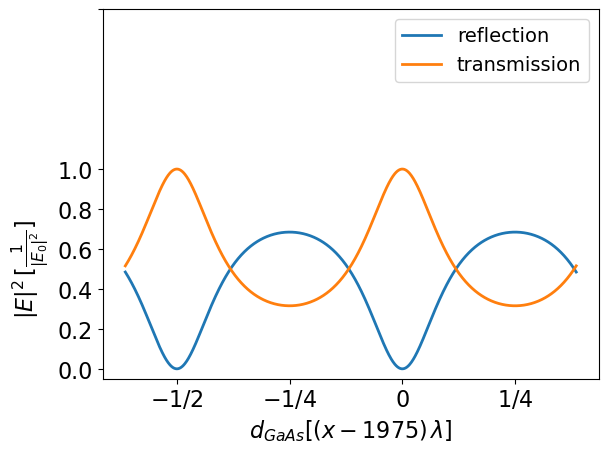

In [2]:
E_0 = 1
z_0 = 500015
colors = ['red','blue', 'green']
z_low = z_0 - np.pi*c/(omega_0*n_medium)
z_high = z_0 + np.pi*c/(omega_0*n_medium)
z_2 = np.linspace(z_low, z_high, 1000)
reflection = []
transmission = []
#E0_t = gauss_pulse(tlist, E_0, sigma=sigma, t_center=t_c)
E0_w = 1#fouriertrafo(E0_t,tlist=tlist,omega_list=omega_list)[325]
for z2 in z_2:
    R,T = reflection_transmission(omega_0 = omega_0, n_medium = n_medium, n_surrounding = n_surrounding, E0_w = E0_w, reflections = True,z_2 = z2)
    reflection.append(R)
    transmission.append(T)
plt.rcParams.update({'font.size': 20})
ax = plt.axes() 
plt.ylabel(r"$|E|^2\,[\frac{1}{|E_0|^2}]$                      ", fontsize = 16)
plt.xlabel('$d_{GaAs} [(x - 1975)\,\lambda]$', fontsize = 16)
plt.xticks(fontsize = 16)

ax.plot(z_2,reflection, label=r'reflection', linewidth = 2)
ax.plot(z_2,transmission, label=r'transmission', linewidth = 2)
#ax.hlines((2/(1+n_medium)) ** 2 * n_medium,z_low,z_high, colors='orange',linestyles = 'dotted',label = r'$\left(\frac{2}{1+n_{2}}\right)^2n_{2}$')
#ax.hlines(1-(2/(1+n_medium)) ** 2 * n_medium,z_low,z_high, colors='blue',linestyles = 'dotted',label = r'$1-\left(\frac{2}{1+n_{2}}\right)^2n_{2}$')
ax.set_xticks([z_2[np.argmax(transmission[:500])], z_2[np.argmin(transmission[:500])], z_2[np.argmax(transmission[500:])+500], z_2[np.argmin(transmission[500:])+500]]) #absolute z2 values on x-axis
#ax.set_xticklabels([int(z_2[np.argmax(transmission[:500])]), int(z_2[np.argmin(transmission[:500])]), int(z_2[np.argmax(transmission[500:])+500]), int(z_2[np.argmin(transmission[500:])+500])], fontsize = 16)
ax.set_xticklabels([r'$-1/2$',r'$-1/4$',r'$0$',r'$1/4$', ], fontsize = 16)
ax.set_yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.8])
ax.set_yticklabels(['0.0', '0.2', '0.4', '0.6', '0.8', '1.0', ''],fontsize = 16)

plt.legend(fontsize = 14)
plt.savefig('transmission_reflection_bare_field.pdf', bbox_inches='tight')

500012.8457578253
499955.82170025934
500139.3124454937


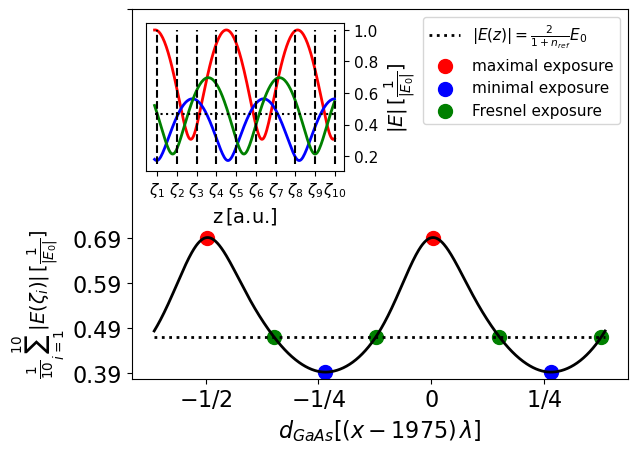

In [21]:
E_0 = 1
#main plot
z_0 = 500015
colors = ['red','blue', 'green']
z_low = z_0 - np.pi*c/(omega_0*n_medium)
z_high = z_0 + np.pi*c/(omega_0*n_medium)
z_2 = np.linspace(z_low, z_high, 1000)
expositions = np.zeros(len(z_2))
#E0_t = gauss_pulse(tlist, E_0, sigma=sigma, t_center=t_c)
E0_w = 1#fouriertrafo(E0_t,tlist=tlist,omega_list=omega_list)[325]
well_positions = np.linspace(4.6, 4.6+10*(7.6+4.6+19.4),10,endpoint = True)
for i,z2 in enumerate(z_2):
    for z in well_positions:
        expos = np.abs(field_in_block(z,E0_w,omega_0, z2, n_medium, n_surrounding, reflections = True))
        expositions[i] +=expos/10
fig, ax = plt.subplots()
#ax.set_xticks([z_low, (z_0+z_low)/2, z_0, (z_0+z_high)/2, z_high]) 
#ax.set_xticklabels([r'$-\lambda$', r'$-\frac{\lambda}{2}$', r'$0$', r'$\frac{\lambda}{2}$', r'$\lambda$'])
ax.plot(z_2,expositions, 'k-', linewidth = 2)
ax.hlines(2/(1+n_medium)*np.abs(E0_w),z_low,z_high, colors='black',linestyles = 'dotted',linewidth = 2, label = r'$|E(z)| = \frac{2}{1+n_{ref}}E_0$')
plt.scatter(z_2[np.argmax(expositions)], np.max(expositions), color = 'red', s = 100, label = 'maximal exposure')
plt.scatter(z_2[np.argmin(expositions)], np.min(expositions), color = 'blue', s = 100, label = 'minimal exposure')
plt.scatter(z_2[np.argmax(expositions[:500])], np.max(expositions), color = 'red', s = 100)
plt.scatter(z_2[np.argmin(expositions[:500])], np.min(expositions), color = 'blue', s = 100)
for x in np.argsort((expositions-2/(1+n_medium)*np.abs(E0_w))**2)[1:4]:
    plt.scatter(z_2[x], expositions[x], color = 'green', s = 100)
    print(z_2[x])
plt.scatter(z_2[np.argmin((expositions-2/(1+n_medium)*np.abs(E0_w))**2)], expositions[np.argmin((expositions-2/(1+n_medium)*np.abs(E0_w))**2)], color = 'green', s = 100, label = 'Fresnel exposure')
plt.ylabel(r"$\frac{1}{10}\sum_{i=1}^{10}|E(\zeta_i)|\,[\frac{1}{|E_0|}]$                                    ", fontsize = 14)
plt.xlabel('$d_{GaAs} [(x - 1975)\,\lambda]$', fontsize = 16)
plt.xticks(fontsize = 16)
#ax.set_xticks([z_2[np.argmax(expositions[:500])], z_2[np.argmin(expositions[:500])], z_2[np.argmax(expositions)], z_2[np.argmin(expositions)]])
ax.set_xticks([z_2[np.argmax(transmission[:500])], z_2[np.argmin(transmission[:500])], z_2[np.argmax(transmission[500:])+500], z_2[np.argmin(transmission[500:])+500]]) #relative z2 values on x-axis
ax.set_xticklabels([r'$-1/2$',r'$-1/4$',r'$0$',r'$1/4$', ], fontsize = 16)
#ax.set_yticks([0.4,0.5,0.6,0.7,1.2])########################################################################
ytick_list = [round(i,2) for i in np.linspace(np.min(expositions), np.max(expositions),4)]+[1.2]
ax.set_yticks(ytick_list)
ax.set_yticklabels([str(i) for i in ytick_list[:-1]]+[''],fontsize = 16)
#ax.set_yticklabels(['0.4', '0.5', '0.6', '0.7', ''],fontsize = 16)
#inset
plt.legend(fontsize = 11)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
ax_inset = inset_axes(ax, width="40%", height="40%", loc='upper left')
z_2 = [z_2[np.argmax(expositions)], z_2[np.argmin(expositions)],500012.8457578253]#z_2[np.argmin((expositions-20/(1+n_medium)*np.abs(E0_w))**2)]]
z_low = 0
z_high = 320
z_list = np.linspace(z_low, z_high, 200)
field = [[],[], []]

#E0_t = gauss_pulse(tlist, E_0, sigma=sigma, t_center=t_c)
E0_w = 1#fouriertrafo(E0_t,tlist=tlist,omega_list=omega_list)[325]
for i,z2 in enumerate(z_2):
    for z in z_list:
        field[i].append(np.abs(field_in_block(z,E0_w,omega_0, z2, n_medium, n_surrounding, reflections = True)))
        

ax_inset.set_xticks(np.linspace(4.6, 4.6+10*(7.6+4.6+19.4),10,endpoint = True)) 
ax_inset.set_xticklabels([r'$\zeta_1$', r'$\zeta_2$', r'$\zeta_3$',r'$\zeta_4$',r'$\zeta_5$',r'$\zeta_6$',r'$\zeta_7$',r'$\zeta_8$',r'$\zeta_9$',r'$\zeta_{10}$'],fontsize = 11)
ax_inset.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax_inset.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'],fontsize = 11)
#print(z2)

for i,z2 in enumerate(z_2):
    ax_inset.plot(z_list,field[i],label = r'$d_{GaAs} = %d\,$nm' % z2, linewidth = 2, color = colors[i])
ax_inset.vlines(np.linspace(4.6, 4.6+10*(7.6+4.6+19.4),10,endpoint = True), 1.5*10**(-1), 1, colors='black', linestyles='dashed')
ax_inset.yaxis.set_label_position("right")
ax_inset.yaxis.tick_right()
#plt.hlines(np.abs(E0_w),z_low,z_high, colors='black',label = r'$E_0$')
ax_inset.hlines(2/(1+n_medium)*np.abs(E0_w),z_low,z_high, colors='black',linestyles = 'dotted',label = r'$\frac{2}{1+n_{ref}}E_0$')
#plt.legend(fontsize = 14, bbox_to_anchor=(1,0.95))
plt.xlabel(r'z$\,$[a.u.]', fontsize = 14)
plt.ylabel(r"$|E|\,$[$\frac{1}{|E_0|}$]", fontsize = 14)
#plt.savefig('bare_field_inside.png', bbox_inches='tight')

#print(z_2)
#plt.rcParams.update({'font.size': 20})
#ax = plt.axes() 
#ax.set_xticks(np.linspace(4.6, 4.6+10*(7.6+4.6+19.4),10,endpoint = True)) 
#ax.set_xticklabels([r'$z_1$', r'$z_2$', r'$z_3$',r'$z_4$',r'$z_5$',r'$z_6$',r'$z_7$',r'$z_8$',r'$z_9$',r'$z_{10}$'])
#plt.xlabel(r'z$\,$[a.u.]')
#plt.ylabel(r"field strength [$\frac{1}{E_0}$]")
#for i,z2 in enumerate(z_2):
#    plt.plot(z_list,field[i],label = r'$d_{GaAs} = %d\,$nm' % z2, linewidth = 2)
#plt.vlines(np.linspace(4.6, 4.6+10*(7.6+4.6+19.4),10,endpoint = True), 1.5*10**(-1), 0.8, colors='black', linestyles='dashed')
#plt.hlines(np.abs(E0_w),z_low,z_high, colors='black',label = r'$E_0$')
#plt.hlines(2/(1+n_medium)*np.abs(E0_w),z_low,z_high, colors='black',linestyles = 'dotted',label = r'$\frac{2}{1+n_{ref}}E_0$')
#plt.legend(fontsize = 14, bbox_to_anchor=(1,0.95))
plt.savefig('max_min_fields_inside.pdf', bbox_inches='tight')

In [210]:
z_0 = 500015
colors = ['red','blue']
z_low = z_0 - np.pi*c/(omega_0*n_medium)
z_high = z_0 + np.pi*c/(omega_0*n_medium)
z_2 = np.linspace(z_low, z_high, 1000)
print(np.argmin((expositions-20/(1+n_medium)*np.abs(E0_w))**2))

765


In [6]:
z_0 = 500015
z_low = z_0 - np.pi*c/(omega_0*n_medium)
z_high = z_0 + np.pi*c/(omega_0*n_medium)
print(np.pi*c/(omega_0*n_medium))

126.59340779633322


In [3]:
lam = 2*np.pi*c/(omega_0*n_medium)
print(lam)

253.18681559266645


In [6]:
print(max(reflection))

0.6844061399787452


In [14]:
for i in range(3):
    print(np.max(field[i]))
    print(np.min(field[i]))
    print(np.min(field[i])/np.max(field[i]))

0.9992239577070207
0.3072041839123647
0.3074427725065006
0.5635867646879975
0.1732886482364177
0.30747465890607023
0.6974703891063038
0.21443056267345065
0.3074403817317735


In [17]:
[i for i in np.linspace(np.min(expositions), np.max(expositions),4)]+[1.2]

[0.39243287544363187,
 0.4922541727419288,
 0.5920754700402256,
 0.6918967673385226,
 1.2]